In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

def unpickle(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='latin1')
    return data

In [3]:
file_img = '/home/dsola/repos/PGA-Net/data/patch20/20140404_3_20_HH_HV_patches_erie.npy'
file_label = '/home/dsola/repos/PGA-Net/data/patch20/20140404_patch20_stride3_erie.pkl'

In [4]:
imgs = np.load(file_img)
labels = unpickle(file_label)

In [111]:
imgs[0].shape

(20, 20, 2)

In [109]:
np.concatenate([imgs, imgs], axis=0).shape[0]

104326

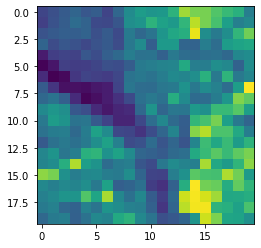

In [12]:
plt.imshow(imgs[0,:,:,0])

(array([ 9641.,     0.,     0.,     0.,     0.,     0.,   615.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,   275.,
            0.,     0.,  3744.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 13854.,     0., 24034.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

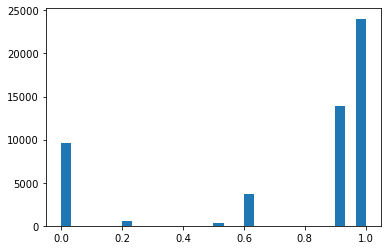

In [35]:
plt.hist(np.array(labels[0]), bins=30)

In [18]:
np.unique(np.array(labels[0]))

array([0.       , 0.2      , 0.5      , 0.6      , 0.9      , 0.9999999,
       1.       ])

In [26]:
(np.array(labels[0])==1).sum()

2939

In [108]:
len(labels[0] + labels[0])

104326

In [34]:
for i in range(10):
    print(labels[2][i], labels[3][i])

11280 16900
11280 16920
11300 16900
11300 16920
11320 16920
11340 16920
11360 16920
11380 16920
11400 16920
11400 16940


In [37]:
data_dir = '/home/dsola/repos/PGA-Net/data/patch20'
files = os.listdir(data_dir)

In [95]:
[x for x in files if '20140328' in x and 'ontario' in x and '.np' in x]

['20140328_3_20_HH_HV_patches_ontario.npy']

In [44]:
tmp = np.load('/home/dsola/repos/PGA-Net/data/patch20/20140328_3_20_HH_HV_patches_erie_bathy.npy')

In [45]:
tmp.shape

(0, 20, 20, 3)

In [83]:
with open("/home/dsola/repos/PGA-Net/data/patch20/imlist_test_ontario.txt","r") as ins:
     for line in ins:
            print(line.strip('\n'))

samples_stride3/HH_HV/patch20/20140112_patch20_stride3_ontario.pkl
samples_stride3/HH_HV/patch20/20140114_patch20_stride3_ontario.pkl
samples_stride3/HH_HV/patch20/20140204_patch20_stride3_ontario.pkl
samples_stride3/HH_HV/patch20/20140301_patch20_stride3_ontario.pkl
samples_stride3/HH_HV/patch20/20140307_patch20_stride3_ontario.pkl
samples_stride3/HH_HV/patch20/20140308_patch20_stride3_ontario.pkl
samples_stride3/HH_HV/patch20/20140325_patch20_stride3_ontario.pkl


In [90]:
line = line.strip('\n')

In [93]:
line.split('/')[-1].split('_')[0]

'20140325'

In [99]:
line.split('/')[-1]

'20140325_patch20_stride3_ontario.pkl'